'Before Filtering the shape (2095624, 28)'

'After Filter the shape (112840, 28)'

'Desire Filter shape (112840, 8)'

Schema([('TIME_TAKEN', Int16),
        ('MONTHLY_CONSUMPTION_EXP', Int16),
        ('ONLINE_EXPENDITURE', Int16),
        ('INFORMANT_CODE', Int16),
        ('RESPONSE_CODE', Int16),
        ('HOUSEHOLD_SIZE', Int16),
        ('VISIT_MONTH', Int16),
        ('MULTIPLIER', Int16)])

Percentage of null values 
TIME_TAKEN ---> 0.00%
MONTHLY_CONSUMPTION_EXP ---> 26.19%
ONLINE_EXPENDITURE ---> 25.01%
INFORMANT_CODE ---> 25.00%
RESPONSE_CODE ---> 25.00%
HOUSEHOLD_SIZE ---> 25.00%
VISIT_MONTH ---> 70.04%
MULTIPLIER ---> 89.81%


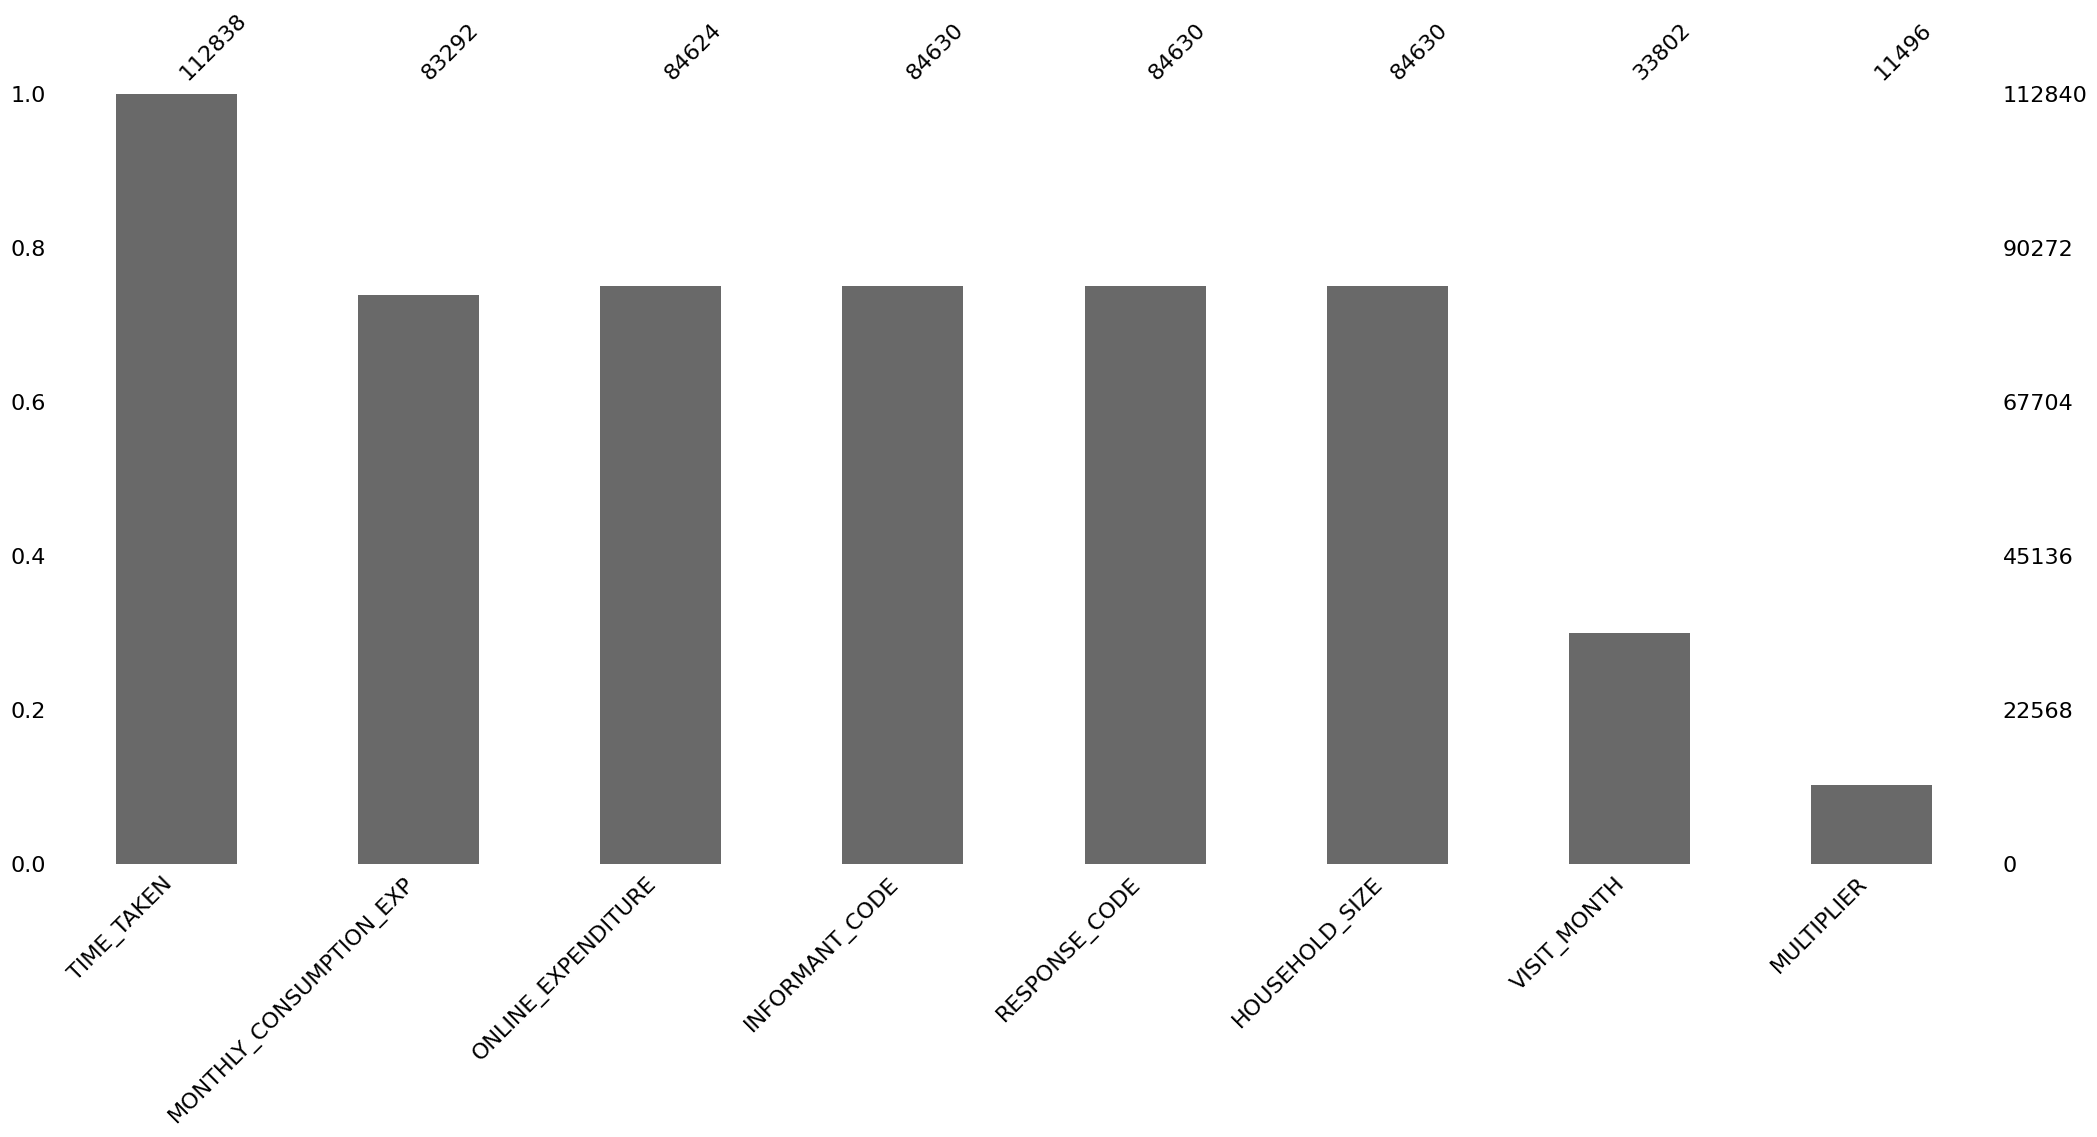

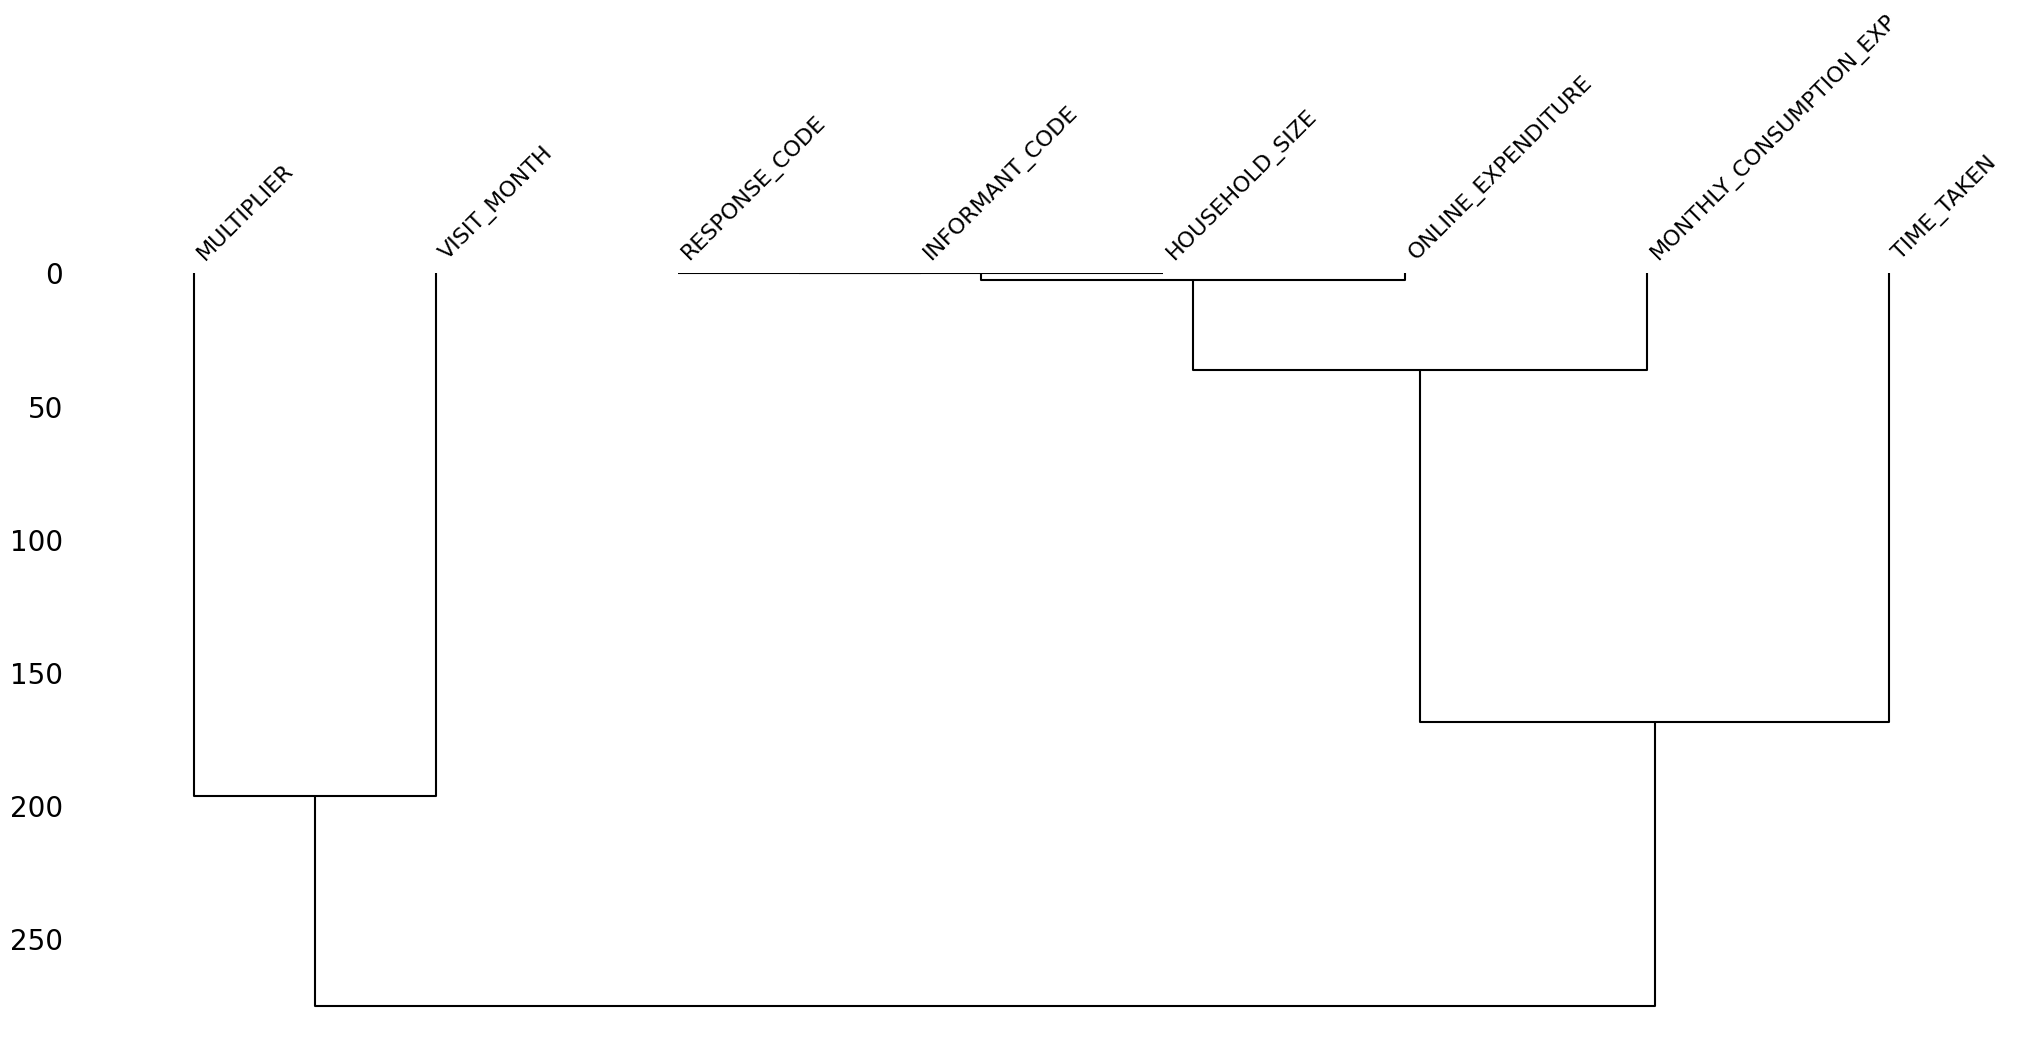

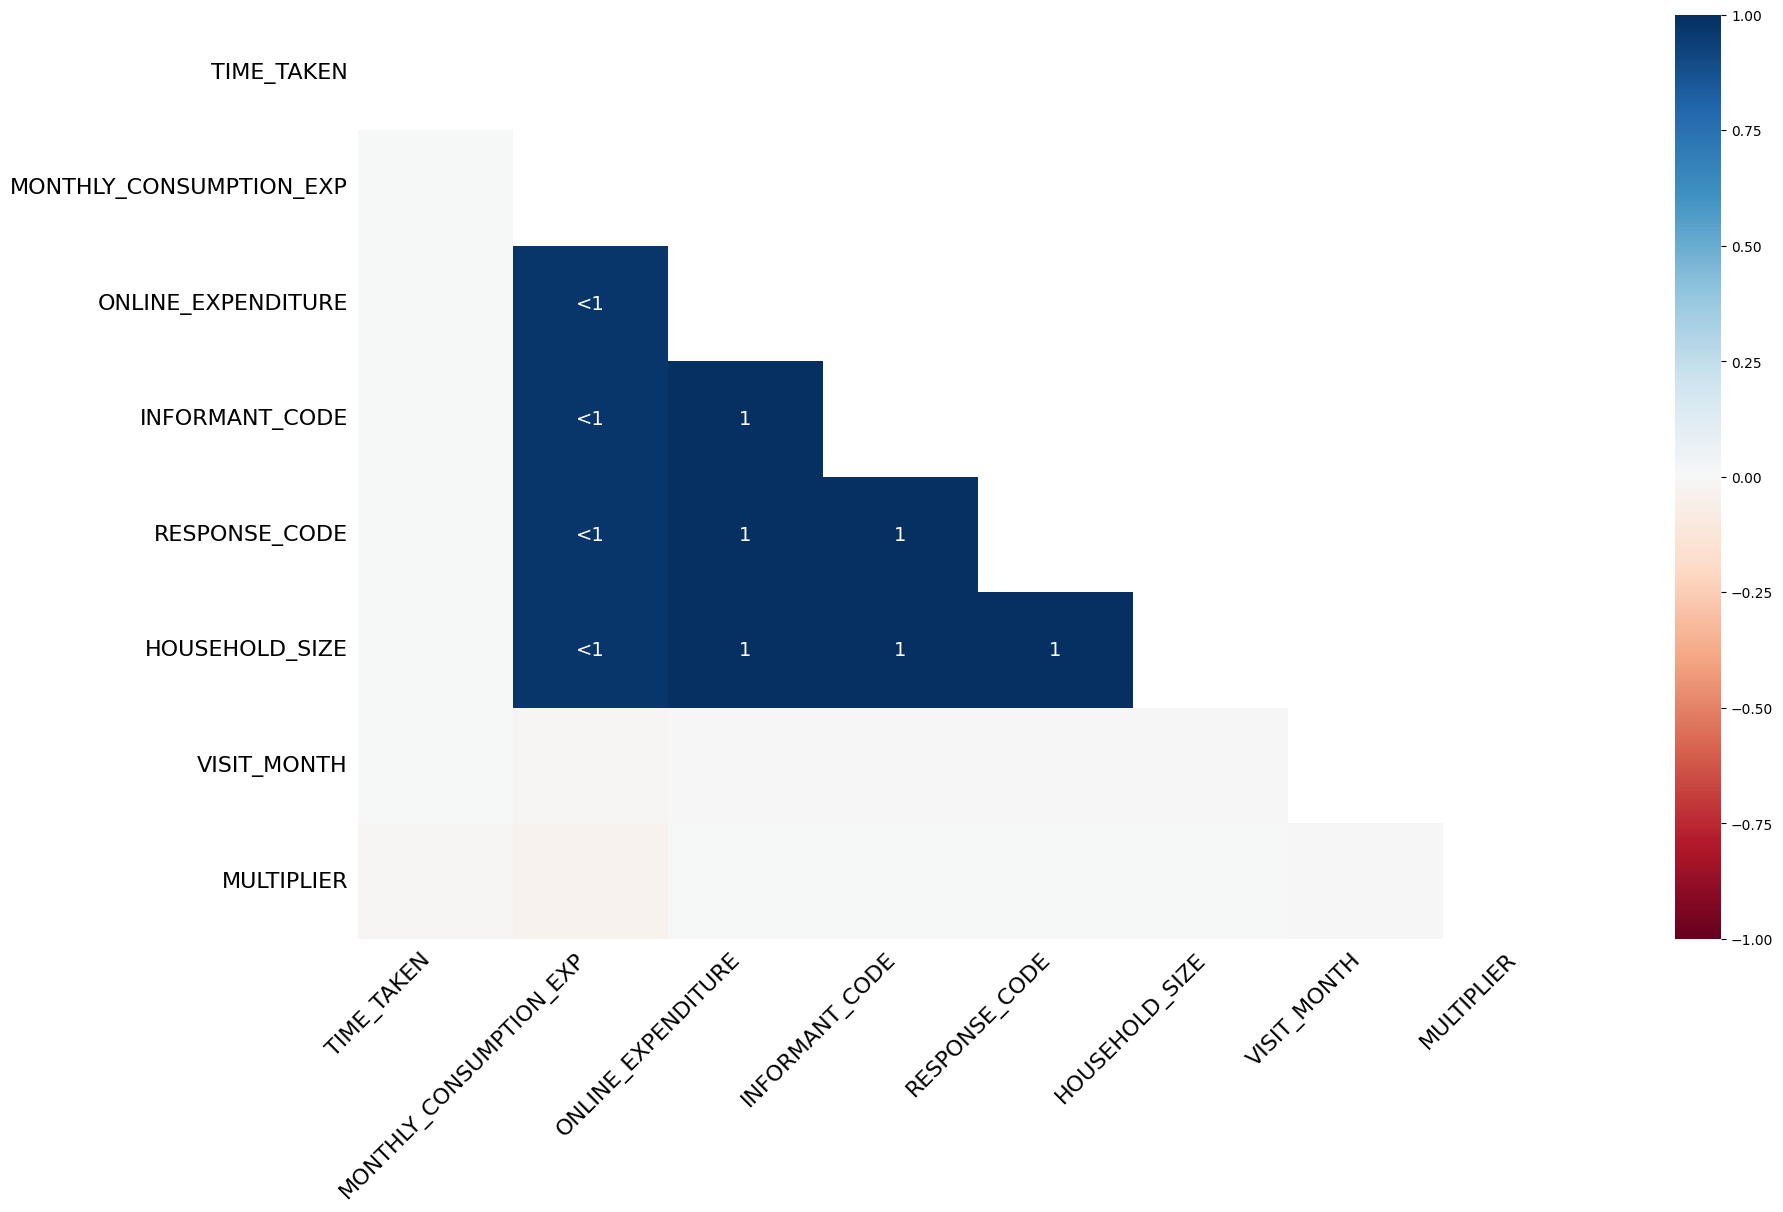

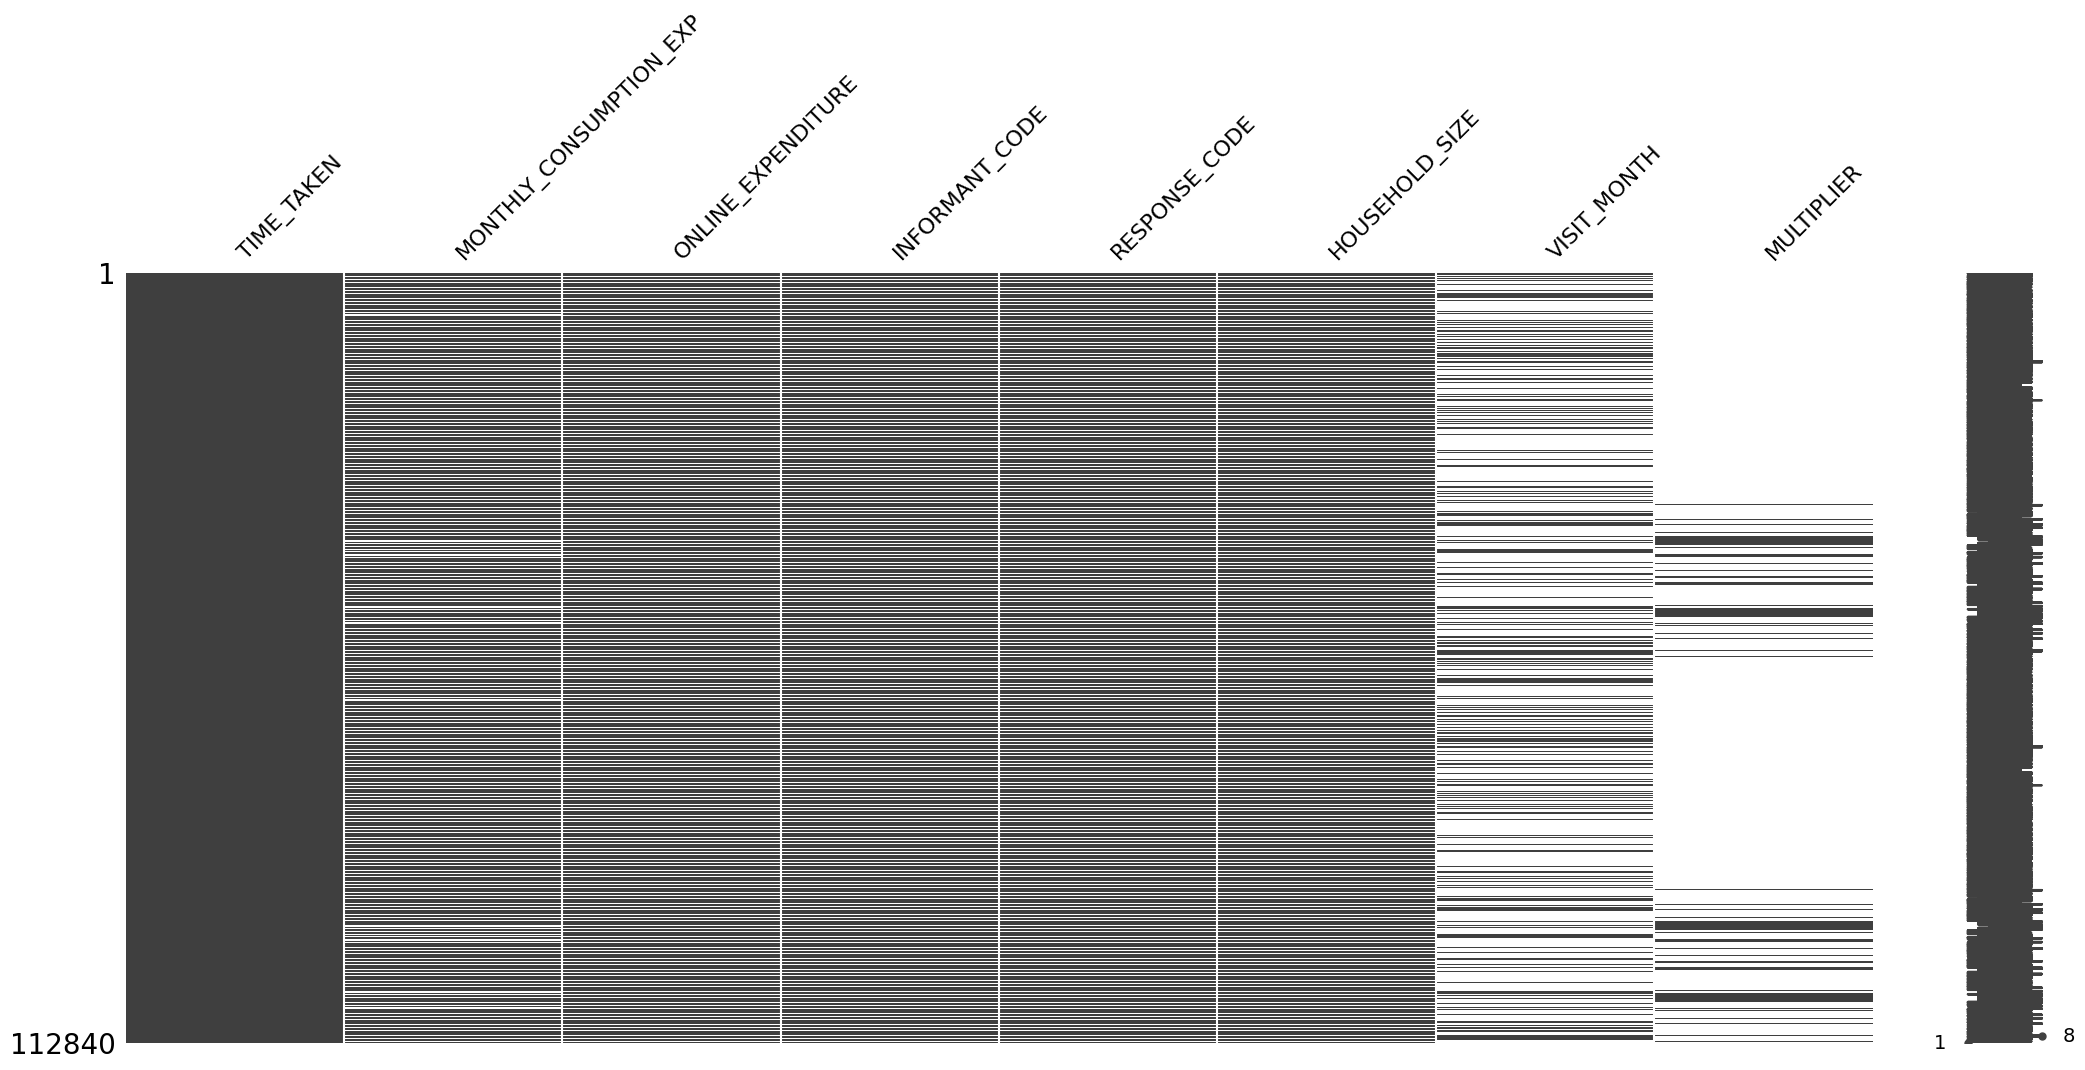

In [1]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-15\data\lev-15_merged.parquet"

# import 
import pandas as pd
import polars as pl
import missingno as msgo
import matplotlib.pyplot as plt
import seaborn as sns

# Functions define for plot null
def plot_null(df: pd.DataFrame):
    msgo.bar(df)
    msgo.dendrogram(df)
    msgo.heatmap(df)
    msgo.matrix(df)

# Import Data and filter
pdf = pl.read_parquet(path)
display(f"Before Filtering the shape {pdf.shape}")
pdf = pdf.filter(
    pl.col('State') == '23'
)
display(f"After Filter the shape {pdf.shape}")

# ------------------------ Our useful variables are 
# ===============================

cols = [
'TIME_TAKEN',
'MONTHLY_CONSUMPTION_EXP',
'ONLINE_EXPENDITURE',
'INFORMANT_CODE',
'RESPONSE_CODE',
'HOUSEHOLD_SIZE',
'VISIT_MONTH',
'MULTIPLIER',
]

pdf = pdf[cols]

display(f"Desire Filter shape {pdf.shape}")

# str -> int 
pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in pdf.columns]
)

display(pdf.schema)

# MP Data
mp_df = pdf.to_pandas()

print("Percentage of null values ")
for col in mp_df.columns:
    null_percentage = (mp_df[col].isnull().sum() / mp_df.shape[0]) * 100
    print(f"{col} ---> {null_percentage:.2f}%")
    
plot_null(mp_df)